In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('udemy_courses.csv')
df
df.columns
df.info
df.isnull().sum()

Unnamed: 0              0
course_id               0
course_title            0
url                     0
is_paid                 0
price                   0
num_subscribers         0
num_reviews             0
num_lectures            0
level                   0
content_duration        0
published_timestamp     0
subject                 0
clean_course_title     20
dtype: int64

In [3]:
df.info

<bound method DataFrame.info of       Unnamed: 0  course_id  \
0              0    1070968   
1              1    1113822   
2              2    1006314   
3              3    1210588   
4              4    1011058   
...          ...        ...   
3678        3678     775618   
3679        3679    1088178   
3680        3680     635248   
3681        3681     905096   
3682        3682     297602   

                                           course_title  \
0                    Ultimate Investment Banking Course   
1     Complete GST Course & Certification - Grow You...   
2     Financial Modeling for Business Analysts and C...   
3     Beginner to Pro - Financial Analysis in Excel ...   
4          How To Maximize Your Profits Trading Options   
...                                                 ...   
3678  Learn jQuery from Scratch - Master of JavaScri...   
3679  How To Design A WordPress Website With No Codi...   
3680                      Learn and Build using Polymer   
3681 

In [4]:
df.isnull().sum()

Unnamed: 0              0
course_id               0
course_title            0
url                     0
is_paid                 0
price                   0
num_subscribers         0
num_reviews             0
num_lectures            0
level                   0
content_duration        0
published_timestamp     0
subject                 0
clean_course_title     20
dtype: int64

In [5]:
#Subject
df['subject'].unique()

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

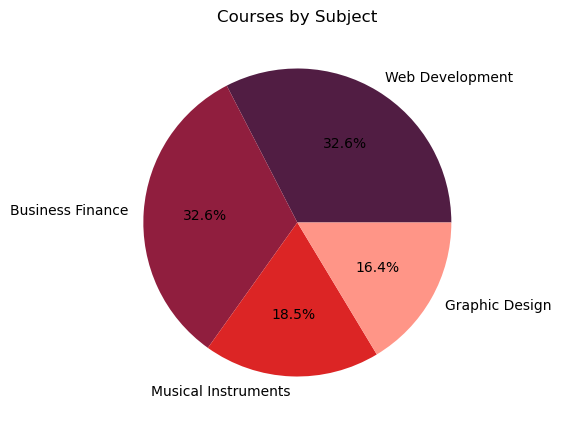

In [6]:
plt.figure(figsize=(5,5))
df['subject'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['#511D43','#901E3E','#DC2525','#FF9587'],
    ylabel=''
)
plt.title("Courses by Subject")
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


In [7]:
#Num_subscribers & subjects
df.groupby('subject')['num_subscribers'].sum()

subject
Business Finance       1870747
Graphic Design         1063148
Musical Instruments     846719
Web Development        7980572
Name: num_subscribers, dtype: int64

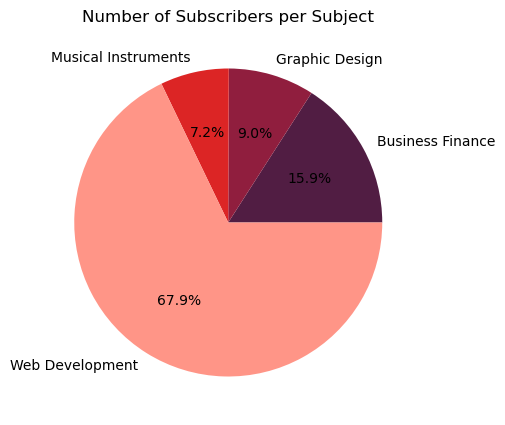

In [8]:
colors = ['#511D43','#901E3E', '#DC2525','#FF9587']
num_subscribers = df.groupby('subject')['num_subscribers'].sum()

plt.figure(figsize=(5,5))
plt.pie(
    num_subscribers.values,
    labels=num_subscribers.index,
    autopct='%1.1f%%',
    colors=colors
)

plt.title("Number of Subscribers per Subject")
plt.gca().set_aspect('equal', adjustable='box')
plt.show()



In [9]:
#num_subscribers
df['num_subscribers'].sum ()

11761186

In [10]:
df['num_subscribers'].mean ()

3193.3711648112953

In [11]:
df.iloc[df['num_subscribers'].idxmax ()]

Unnamed: 0                                                          2832
course_id                                                          41295
course_title                        Learn HTML5 Programming From Scratch
url                    https://www.udemy.com/learn-html5-programming-...
is_paid                                                            False
price                                                               Free
num_subscribers                                                   268923
num_reviews                                                         8629
num_lectures                                                          45
level                                                         All Levels
content_duration                                              10.5 hours
published_timestamp                                 2013-02-14T07:03:41Z
subject                                                  Web Development
clean_course_title                       Learn HTML

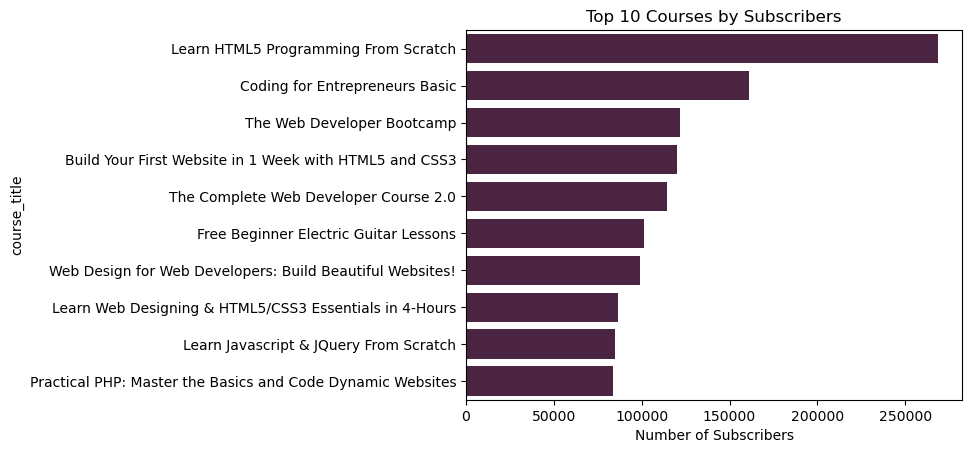

In [12]:

top10_courses = df.groupby('course_title')['num_subscribers'].sum() \
                  .sort_values(ascending=False) \
                  .head(10) \
                  .reset_index()
sns.barplot(
    data=top10_courses, 
    x='num_subscribers', 
    y='course_title', 
    color="#511D43"
)

plt.title("Top 10 Courses by Subscribers")
plt.xlabel("Number of Subscribers")
plt.show()

In [13]:
#levels
df['level'].unique()

array(['All Levels', 'Intermediate Level', 'Beginner Level',
       'Expert Level', '52'], dtype=object)

In [14]:
df['level'] = df['level'].astype('category')
df['level'] = df['level'].cat.remove_unused_categories()

In [15]:
df['level'].unique()

['All Levels', 'Intermediate Level', 'Beginner Level', 'Expert Level', '52']
Categories (5, object): ['52', 'All Levels', 'Beginner Level', 'Expert Level', 'Intermediate Level']

In [16]:
df = df[df['level'] != '52']
df['level'] = df['level'].cat.remove_unused_categories()

C:\Users\dell\AppData\Local\Temp\ipykernel_8128\328179091.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['level'] = df['level'].cat.remove_unused_categories()


In [17]:
df = df.loc[df['level'] != '52'].copy()
df['level'] = df['level'].cat.remove_unused_categories()

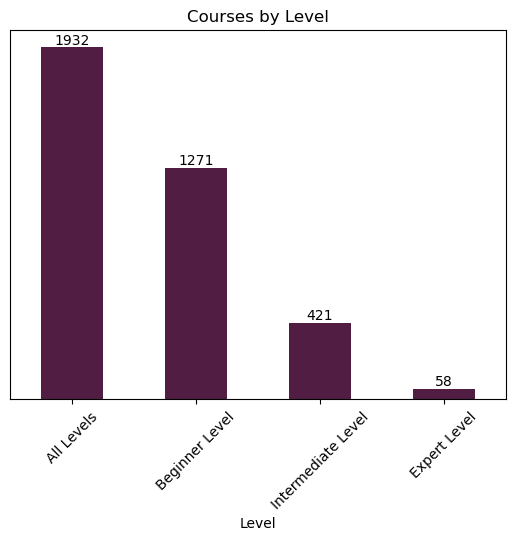

In [18]:
ax = df['level'].value_counts().plot(
    kind='bar',
    color="#511D43"
)
ax.set_ylabel("")
ax.set_yticks([])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.grid(False)

for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.xlabel("Level")
plt.title("Courses by Level")
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_8128\2751860876.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  subs_by_level = df.groupby('level')['num_subscribers'].sum().sort_values(ascending=False)


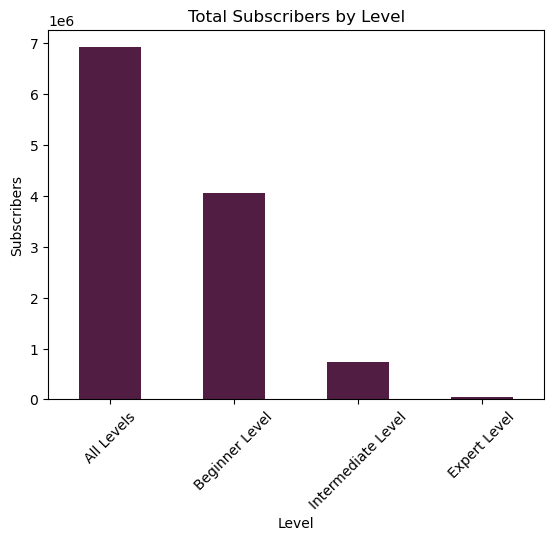

In [19]:
subs_by_level = df.groupby('level')['num_subscribers'].sum().sort_values(ascending=False)


ax = subs_by_level.plot(
    kind='bar',
    color="#511D43"
)

ax.set_ylabel("Subscribers")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.grid(False)

plt.xlabel("Level")
plt.title("Total Subscribers by Level")
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_8128\1953708102.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


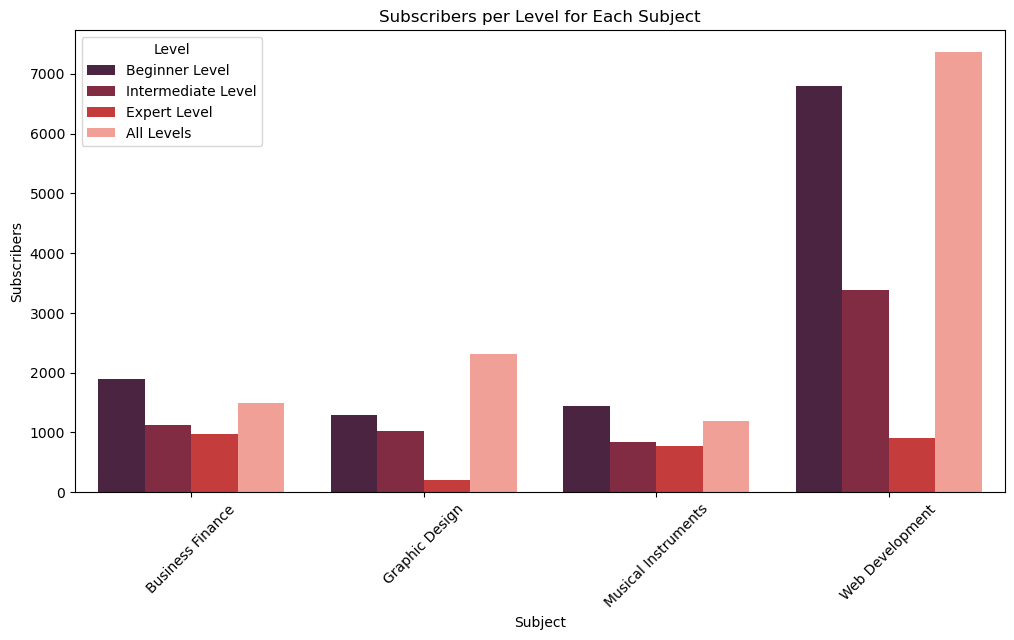

In [20]:
level_order = ['Beginner Level', 'Intermediate Level', 'Expert Level', 'All Levels']
colors = ['#511D43','#901E3E', '#DC2525','#FF9587'] 

plt.figure(figsize=(12,6))
sns.barplot(
    data=df,
    x='subject',
    y='num_subscribers',
    hue='level',
    hue_order=level_order,
    palette=colors ,
    ci=None 
)

plt.xlabel("Subject")
plt.ylabel("Subscribers")
plt.title("Subscribers per Level for Each Subject")
plt.xticks(rotation=45)
plt.legend(title='Level')
plt.show()

In [21]:

def draw_function(y_col):
    plt.figure(figsize=(10,6))  # تكبير حجم الشكل
    sns.barplot( x='level', y=y_col, data=df,hue='subject',ci=None, palette=colors)
    plt.title('Plot of {} per level per subject'.format(y_col), fontsize=16)
    plt.xlabel('Level', fontsize=14)
    plt.ylabel(y_col, fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(title='Subject')
    plt.show()


C:\Users\dell\AppData\Local\Temp\ipykernel_8128\3135852036.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=subject_long,x='subject',y='Count',hue='Metric',palette=['#511D43','#901E3E'],ci=None)


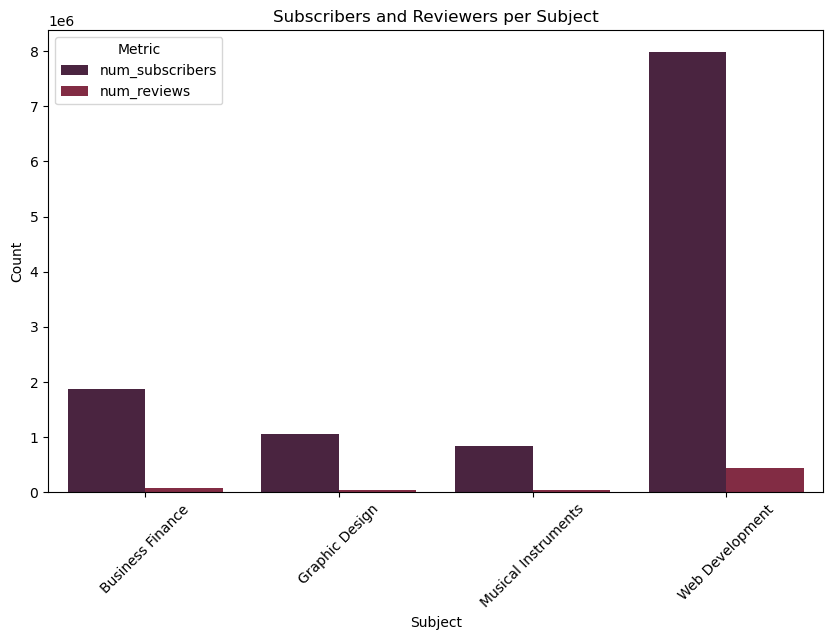

In [22]:
subject_stats = df.groupby('subject')[['num_subscribers', 'num_reviews']].sum().reset_index()
subject_long = subject_stats.melt(id_vars='subject', value_vars=['num_subscribers','num_reviews'],
                                  var_name='Metric', value_name='Count')

plt.figure(figsize=(10,6))
sns.barplot(data=subject_long,x='subject',y='Count',hue='Metric',palette=['#511D43','#901E3E'],ci=None)

plt.xlabel('Subject')
plt.ylabel('Count')
plt.title('Subscribers and Reviewers per Subject')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.show()

In [23]:
#price
df['price'].dtype


dtype('O')

In [24]:
df['price'].unique()

array(['200', '75', '45', '95', '150', '65', '195', '30', '20', '50',
       '175', '140', '115', '190', '125', '60', '145', '105', '155',
       '185', '180', '120', '25', '160', '40', 'Free', '100', '90', '35',
       '80', '70', '55', '165', '130', '85', '170', '110', '135'],
      dtype=object)

In [25]:
df['price'] = df['price'].str.replace('Free','0')

In [26]:
df['price'].unique()

array(['200', '75', '45', '95', '150', '65', '195', '30', '20', '50',
       '175', '140', '115', '190', '125', '60', '145', '105', '155',
       '185', '180', '120', '25', '160', '40', '0', '100', '90', '35',
       '80', '70', '55', '165', '130', '85', '170', '110', '135'],
      dtype=object)

In [27]:
df['price'] = df['price'].astype(int)

In [28]:
df['price'].mean()

66.01032047800109

In [29]:
df['price'].max()

200

In [30]:
df['price'].min()

0

In [31]:
df['profit'] = df['price'] * df['num_subscribers']

In [32]:
df['profit'].max()

24316800

In [33]:
df.iloc[ df['profit'].idxmax() ]  

Unnamed: 0                                                   3236
course_id                                                  164554
course_title                  AngularJS JumpStart with Dan Wahlin
url                    https://www.udemy.com/angularjs-jumpstart/
is_paid                                                      True
price                                                          75
num_subscribers                                             17802
num_reviews                                                  2144
num_lectures                                                  113
level                                                  All Levels
content_duration                                         10 hours
published_timestamp                          2014-03-24T17:31:15Z
subject                                           Web Development
clean_course_title                 AngularJS JumpStart Dan Wahlin
profit                                                    1335150
Name: 3236

In [34]:
df['is_paid'].value_counts()

is_paid
True     2738
TRUE      634
False     264
FALSE      46
Name: count, dtype: int64

In [35]:
paid_dict = {'true': True , 'TRUE': True , 'false' : False , 'FALSE' : False }

In [36]:
df['is_paid'] = df['is_paid'].str.replace('TRUE','True')
df['is_paid'] = df['is_paid'].str.replace('FALSE','False')

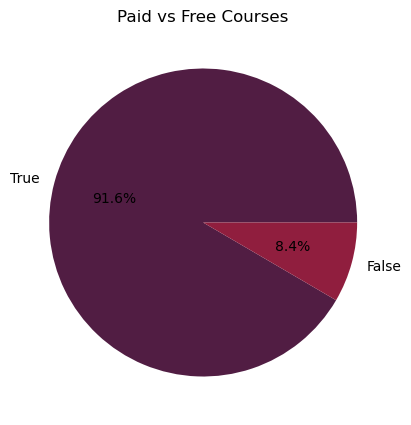

In [37]:
plt.figure(figsize=(5,5))
df['is_paid'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['#511D43', '#901E3E'],
    ylabel=''
)
plt.title("Paid vs Free Courses")
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [38]:
df['published_timestamp']

0       2017-01-18T20:58:58Z
1       2017-03-09T16:34:20Z
2       2016-12-19T19:26:30Z
3       2017-05-30T20:07:24Z
4       2016-12-13T14:57:18Z
                ...         
3678    2016-06-14T17:36:46Z
3679    2017-03-10T22:24:30Z
3680    2015-12-30T16:41:42Z
3681    2016-08-11T19:06:15Z
3682    2014-09-28T19:51:11Z
Name: published_timestamp, Length: 3682, dtype: object

In [39]:
df['published_timestamp'].str.split('T')

0       [2017-01-18, 20:58:58Z]
1       [2017-03-09, 16:34:20Z]
2       [2016-12-19, 19:26:30Z]
3       [2017-05-30, 20:07:24Z]
4       [2016-12-13, 14:57:18Z]
                 ...           
3678    [2016-06-14, 17:36:46Z]
3679    [2017-03-10, 22:24:30Z]
3680    [2015-12-30, 16:41:42Z]
3681    [2016-08-11, 19:06:15Z]
3682    [2014-09-28, 19:51:11Z]
Name: published_timestamp, Length: 3682, dtype: object

In [40]:
df['date'] = df['published_timestamp'].str.split('T').str.get(0)

In [41]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [42]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [43]:
df['year'].unique()

array([2017, 2016, 2014, 2015, 2013, 2012, 2011])

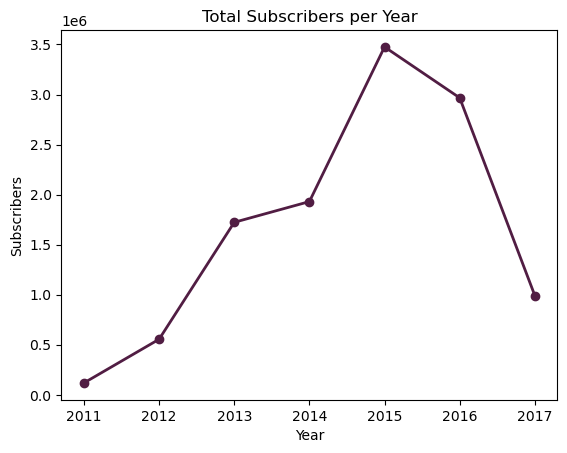

In [44]:
df.groupby('year')['num_subscribers'].sum().plot (kind='line' , color = '#511D43' , marker='o', linewidth=2   )

plt.title('Total Subscribers per Year')
plt.xlabel('Year')
plt.ylabel('Subscribers')
plt.show()

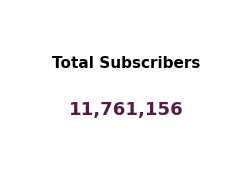

In [45]:
total_subs = df['num_subscribers'].sum()

fig, ax = plt.subplots(figsize=(3,2))
ax.text(0.5, 0.65, "Total Subscribers", ha='center', va='center', fontsize=11, weight='bold')
ax.text(0.5, 0.35, f"{total_subs:,}", ha='center', va='center', fontsize=13, color='#511D43', weight='bold')
ax.set_facecolor("#f9f9f9")
ax.axis('off')
plt.show()

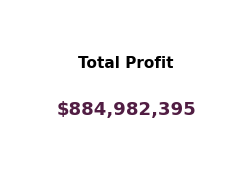

In [46]:
total_profit = (df['price'] * df['num_subscribers']).sum()

fig, ax = plt.subplots(figsize=(3,2))
ax.text(0.5, 0.65, "Total Profit", ha='center', va='center', fontsize=11, weight='bold')
ax.text(0.5, 0.35, f"${total_profit:,}", ha='center', va='center', fontsize=13, color='#511D43', weight='bold')
ax.set_facecolor("#f9f9f9")
ax.axis('off')
plt.show()

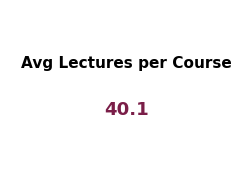

In [47]:
avg_lectures = df['num_lectures'].mean()

fig, ax = plt.subplots(figsize=(3,2))
ax.text(0.5, 0.65, "Avg Lectures per Course", ha='center', va='center', fontsize=11, weight='bold')
ax.text(0.5, 0.35, f"{avg_lectures:.1f}", ha='center', va='center', fontsize=13, color='#7A1E48', weight='bold')
ax.set_facecolor("#f9f9f9")
ax.axis('off')
plt.show()

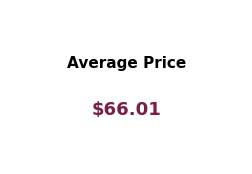

In [48]:
avg_price = df['price'].mean()

fig, ax = plt.subplots(figsize=(3,2))
ax.text(0.5, 0.65, "Average Price", ha='center', va='center', fontsize=11, weight='bold')
ax.text(0.5, 0.35, f"${avg_price:.2f}", ha='center', va='center', fontsize=13, color='#7A1E48', weight='bold')
ax.set_facecolor("#f9f9f9")
ax.axis('off')
plt.show()

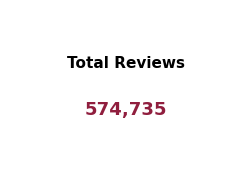

In [49]:
total_reviews = df['num_reviews'].sum()

fig, ax = plt.subplots(figsize=(3,2))
ax.text(0.5, 0.65, "Total Reviews", ha='center', va='center', fontsize=11, weight='bold')
ax.text(0.5, 0.35, f"{total_reviews:,}", ha='center', va='center', fontsize=13, color='#901E3E', weight='bold')
ax.set_facecolor("#f9f9f9")
ax.axis('off')
plt.show()